# Softmax Regression

This note introduces the **Softmax Regression** algorithm using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is Softmax Regression?

Softmax Regression (also called **Multinomial Logistic Regression**) is a method for predicting **multi-class outcomes** — like cat, dog, or bird; or class 0, 1, 2.

Instead of fitting a single S-shaped curve like in binary Logistic Regression, it fits a model that estimates the probability for **each class**, using a **softmax function** to ensure all the predicted probabilities are between 0 and 1 and sum to 1.

It learns from labeled data to find the best decision boundaries between multiple classes and uses that to classify new inputs.

This notebook will:

- Use `scikit-learn` to demonstrate how Softmax Regression works in practice  
- Explain the logic behind it in an intuitive way  
- Show how to implement the same idea step by step from scratch  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

First, let's create a simple synthetic dataset for a **multi-class classification** problem.

We'll generate points along a line and assign labels based on the value of `X`, dividing into three classes.

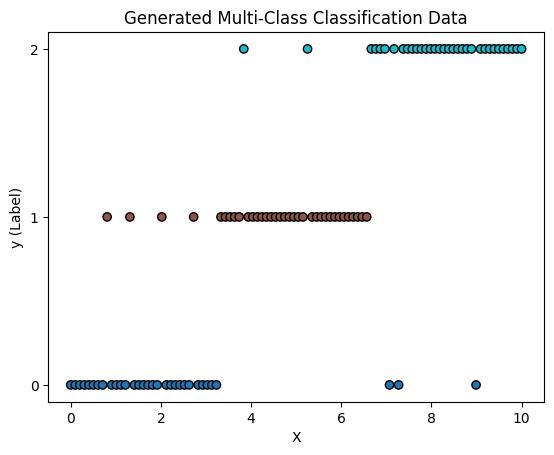

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create multi-class classification data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)

# Define 3 classes: 0 if X < 3.3, 1 if 3.3 <= X < 6.6, 2 if X >= 6.6
y = np.zeros_like(X, dtype=int)
y[X[:, 0] > 3.3] = 1
y[X[:, 0] > 6.6] = 2

# Add some noise to make the classification a bit messy
noise = (np.random.rand(*y.shape) > 0.9).astype(int)
y = (y + noise) % 3  # random small jumps between classes

# Visualize the data
plt.scatter(X, y, c=y.ravel(), cmap='tab10', edgecolors='k')
plt.title("Generated Multi-Class Classification Data")
plt.xlabel("X")
plt.ylabel("y (Label)")
plt.yticks([0, 1, 2])
plt.show()


## Implement with Scikit-Learn

We’ll now use `scikit-learn` to fit a **Softmax Regression model** on our **simple multi-class classification dataset**.

The data is divided into three regions along `X`, and our goal is to fit a model that estimates the **probability** that a given input belongs to each class (0, 1, or 2).

Softmax Regression is perfect for this, as it models the outputs using the **softmax function**

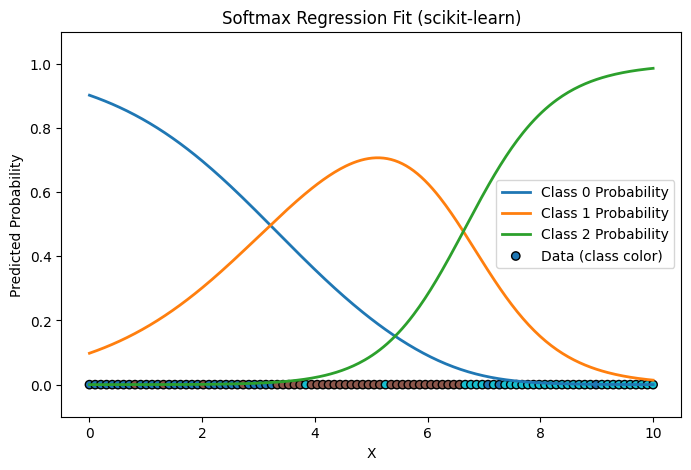

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit softmax regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X, y.ravel())  # y must be 1D for sklearn

# Predict probabilities for a smooth curve
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
proba = model.predict_proba(X_plot)

# Plot probability curves
plt.figure(figsize=(8, 5))
for class_idx in range(3):
    plt.plot(X_plot, proba[:, class_idx], linewidth=2, label=f'Class {class_idx} Probability')

# Optionally, scatter input data points slightly below 0
plt.scatter(X, np.full_like(y, -0.05), c=y.ravel(), cmap='tab10', edgecolors='k', label="Data (class color)")

plt.title("Softmax Regression Fit (scikit-learn)")
plt.xlabel("X")
plt.ylabel("Predicted Probability")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


## Understanding the Visualization

The plot above shows how a **Softmax Regression model** learns to classify data into **three groups — class 0, class 1, and class 2** — based on a single input feature `X`.

- The scatter points represent the raw data (colored by class)  
- The three curves show the model’s **predicted probability** for each class  
- For any input `X`, the predicted probabilities **add up to 1**

Instead of predicting a number or a binary probability, Softmax Regression estimates a **full probability distribution over multiple classes**.

## Behind the Scenes

### 1. The Goal

We want to find the best model that smoothly predicts the probability for each possible class.

Instead of predicting a single real number like in linear regression:

$$
\hat{y} = w \cdot x + b
$$

We want to predict a **vector of probabilities** for all classes:

$$
\hat{y}_k = P(y = k \mid x)
$$

where $k$ is the class index.

We do this by computing a separate score $z_k$ for each class:

$$
z_k = w_k \cdot x + b_k
$$

and then passing all the scores through a **softmax function** to convert them into probabilities.

### 2. Why the Softmax Function?

The softmax function **squashes** a list of real-valued scores into a **probability distribution**.

Given scores $z_0, z_1, ..., z_{K-1}$, the softmax function computes:

$$
\text{softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=0}^{K-1} e^{z_j}}
$$

Where:
- $e$ is Euler’s number ($\approx 2.718$)  
- $K$ is the number of classes  
- Every softmax output is between 0 and 1  
- All the softmax outputs add up to 1

This ensures that we treat the output as a proper **probability distribution over classes**.

Each $z_k$ comes from a separate linear model:

$$
z_k = w_k \cdot x + b_k
$$

Then the model's output for input $x$ is:

$$
\hat{y}_k = \frac{e^{w_k \cdot x + b_k}}{\sum_{j=0}^{K-1} e^{w_j \cdot x + b_j}}
$$

### 3. How Good is the Prediction? (Loss Function)

To measure how well the model fits the multi-class classification task, we use the **cross-entropy loss**, generalized for multiple classes.

For a single input with true class $y$, the loss is:

$$
J = -\log(\hat{y}_y)
$$

Where:
- $\hat{y}_y$ is the predicted probability for the correct class

For $n$ total points, we average the losses:

$$
J(W, b) = -\frac{1}{n} \sum_{i=1}^{n} \log(\hat{y}_{i, y_i})
$$

This means:
- If the model predicts a high probability for the correct class, the loss is small.
- If it predicts a low probability for the correct class, the loss is large.

### 4. How to Minimize the Loss? (Gradient Descent)

We want to adjust the weights $W$ and biases $b$ to minimize the cost $J(W, b)$.

To do this, we use **gradient descent**, updating each weight step-by-step based on the slope of the loss:

For each class $k$:

$$
w_k := w_k - \alpha \cdot \frac{\partial J}{\partial w_k}
$$

$$
b_k := b_k - \alpha \cdot \frac{\partial J}{\partial b_k}
$$

Where:
- $\alpha$ is the learning rate (step size)
- The gradients are derived using the chain rule applied to the softmax and cross-entropy loss.

### 5. Derivatives Step-by-Step (Single Point)

Let’s look at one data point:

- Input: $x$  
- True class: $y \in \{0, 1, ..., K-1\}$  
- Scores: $z_k = w_k \cdot x + b_k$ for each class $k$  
- Predicted probabilities (after softmax): $\hat{y}_k$

The loss is:

$$
J = -\log(\hat{y}_y)
$$

The gradients are:

For each class $k$:

$$
\frac{\partial J}{\partial z_k} =
\begin{cases}
\hat{y}_k - 1 & \text{if } k = y \\
\hat{y}_k & \text{if } k \neq y
\end{cases}
$$

Then:

$$
\frac{\partial J}{\partial w_k} = \frac{\partial J}{\partial z_k} \cdot x
$$

$$
\frac{\partial J}{\partial b_k} = \frac{\partial J}{\partial z_k}
$$

In words:
- For the correct class, the gradient is $(\hat{y}_k - 1) \times x$
- For the wrong classes, the gradient is $\hat{y}_k \times x$

This reflects the intuition that we want:
- To **increase** the score for the true class
- To **decrease** the scores for the wrong classes

### 6. Generalizing to All Data Points

For the entire dataset of $n$ samples, we average the gradients:

$$
\frac{\partial J}{\partial w_k} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i,k} - 1_{(y_i = k)}) \cdot x_i
$$

$$
\frac{\partial J}{\partial b_k} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i,k} - 1_{(y_i = k)})
$$

where $1_{(y_i = k)}$ is 1 if $y_i = k$ and 0 otherwise.

This tells us exactly how to update each weight and bias to reduce the loss.

### 7. When to Stop: Convergence Criteria

We keep updating $W$ and $b$ until one of these conditions is met:

- The loss becomes very small  
- The change in loss between updates is smaller than a threshold (e.g., $10^{-6}$)  
- We reach the maximum number of iterations

> Softmax Regression doesn’t try to hit every point exactly.  
> It finds smooth probability transitions between classes — based on predicted class distributions.

This completes the full math logic of Softmax Regression — from raw scores to softmax transformation, to loss minimization using gradient descent.

## Let’s Code It

Now that we understand the math and logic behind Softmax Regression, let’s put it into practice.


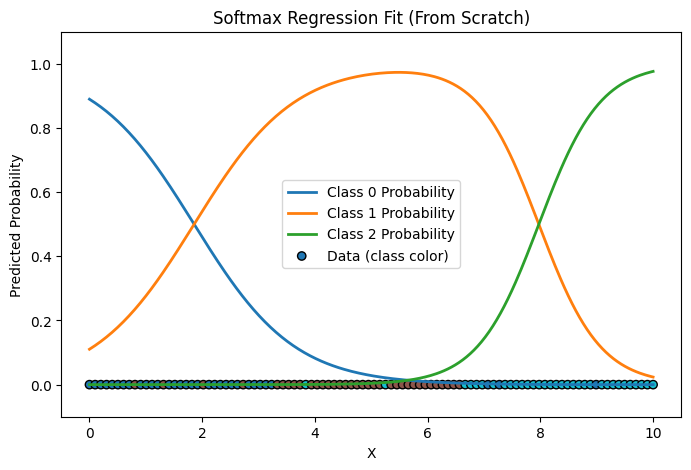

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MySoftmaxRegression:
    def __init__(self, learning_rate=0.1, max_iter=1000, tol=1e-6):
        self.alpha = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.W = None  # Weight matrix (n_features x n_classes)
        self.b = None  # Bias vector (n_classes)

    def softmax(self, z):
        # Softmax over classes
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, y_hat, y_true):
        # Cross-entropy loss for multi-class classification
        n_samples = y_true.shape[0]
        # Convert true labels to one-hot
        y_one_hot = np.eye(self.W.shape[1])[y_true.flatten()]
        # Compute cross-entropy
        loss = -np.sum(y_one_hot * np.log(y_hat + 1e-15)) / n_samples
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = np.max(y) + 1

        # Initialize weights and bias
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        prev_loss = float('inf')

        for i in range(self.max_iter):
            # Step 1: Compute scores z = XW + b
            z = np.dot(X, self.W) + self.b

            # Step 2: Apply softmax
            y_hat = self.softmax(z)

            # Step 3: Compute loss
            loss = self.compute_loss(y_hat, y)

            # Step 4: Check for convergence
            if abs(prev_loss - loss) < self.tol:
                print(f"Converged at iteration {i}, loss: {loss:.6f}")
                break
            prev_loss = loss

            # Step 5: Compute gradients
            y_one_hot = np.eye(n_classes)[y.flatten()]
            dz = (y_hat - y_one_hot) / n_samples  # shape (n_samples, n_classes)

            dW = np.dot(X.T, dz)  # shape (n_features, n_classes)
            db = np.sum(dz, axis=0, keepdims=True)  # shape (1, n_classes)

            # Step 6: Update parameters
            self.W -= self.alpha * dW
            self.b -= self.alpha * db

    def predict_proba(self, X):
        z = np.dot(X, self.W) + self.b
        return self.softmax(z)

    def predict(self, X):
        y_hat = self.predict_proba(X)
        return np.argmax(y_hat, axis=1)

# --- Now train and visualize like sklearn ---

# Assume you already have X, y created from earlier (multi-class)

model = MySoftmaxRegression(learning_rate=0.5, max_iter=1000)
model.fit(X, y)

# Predict over smooth curve
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
proba = model.predict_proba(X_plot)

# Plotting
plt.figure(figsize=(8, 5))
for class_idx in range(proba.shape[1]):
    plt.plot(X_plot, proba[:, class_idx], linewidth=2, label=f'Class {class_idx} Probability')

plt.scatter(X, np.full_like(y, -0.05), c=y.ravel(), cmap='tab10', edgecolors='k', label="Data (class color)")
plt.title("Softmax Regression Fit (From Scratch)")
plt.xlabel("X")
plt.ylabel("Predicted Probability")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


## It Works!!

The probability curves produced by our scratch implementation closely match the results from **scikit-learn**.

This confirms that the gradient descent logic — computing the multi-class cross-entropy loss, applying the chain rule for softmax, and updating the parameters — behaves exactly as expected.

We've successfully built **Softmax Regression** from the ground up!